# Model - Building

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [2]:
data = pd.read_csv('Churn.csv')
data

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
4517,4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4518,4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0
4519,4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [3]:
data = data.drop("Unnamed: 0",axis=1)
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [4]:
X=data.drop('y',axis=1)
X.head(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [5]:
y = data['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

## Decision Tree Classifier

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
model_Dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_Dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [8]:
DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:
y_pred = model_Dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
model_Dt.score(X_test,y_test)

0.9049723756906077

In [11]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       804
           1       0.64      0.35      0.45       101

    accuracy                           0.90       905
   macro avg       0.78      0.66      0.70       905
weighted avg       0.89      0.90      0.89       905



In [12]:
print(metrics.confusion_matrix(y_test,y_pred))

[[784  20]
 [ 66  35]]


In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [14]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [15]:
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9329940627650551
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       580
           1       0.92      0.95      0.93       599

    accuracy                           0.93      1179
   macro avg       0.93      0.93      0.93      1179
weighted avg       0.93      0.93      0.93      1179



In [16]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[533  47]
 [ 32 567]]


## Random Forest Classifier

In [17]:
model_Rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
model_Rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [18]:
y_pred=model_Rf.predict(X_test)
model_Rf.score(X_test,y_test)

0.8917127071823204

In [19]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       804
           1       1.00      0.03      0.06       101

    accuracy                           0.89       905
   macro avg       0.95      0.51      0.50       905
weighted avg       0.90      0.89      0.84       905



In [20]:
print(metrics.confusion_matrix(y_test,y_pred))

[[804   0]
 [ 98   3]]


In [21]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [22]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [23]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [24]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9499575911789653
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       559
           1       0.94      0.97      0.95       620

    accuracy                           0.95      1179
   macro avg       0.95      0.95      0.95      1179
weighted avg       0.95      0.95      0.95      1179



In [25]:
print(metrics.confusion_matrix(yr_test1,yr_predict1))

[[521  38]
 [ 21 599]]


## XGBoost Classifier

In [26]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [27]:
model_xg_smote=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100, ...)

In [28]:
yr_predict2 = model_xg_smote.predict(xr_test2)
model_score_r2 = model_xg_smote.score(xr_test2, yr_test2)

In [29]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))
print(metrics.confusion_matrix(yr_test2, yr_predict2))

0.9728583545377438
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       564
           1       0.98      0.97      0.97       615

    accuracy                           0.97      1179
   macro avg       0.97      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179

[[553  11]
 [ 21 594]]


## Logistic Regression

In [30]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [31]:
model_lr_smote=LogisticRegression( random_state = 100)
model_lr_smote.fit(xr_train3,yr_train3)

C:\Users\Varsha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [32]:
yr_predict3 = model_lr_smote.predict(xr_test3)
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)

In [33]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))

0.9083969465648855
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       531
           1       0.93      0.91      0.92       648

    accuracy                           0.91      1179
   macro avg       0.91      0.91      0.91      1179
weighted avg       0.91      0.91      0.91      1179



In [34]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[484  47]
 [ 61 587]]


# Cross_Validation

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.86% (0.61%)


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}
rs = RandomizedSearchCV(model_xg_smote, params, cv=5, random_state=42, n_jobs=-1)
rs.fit(xr_train2,yr_train2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F480044610>,
         

In [37]:
y_pred = rs.predict(xr_test2)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yr_test2, y_pred)
print("Best hyperparameters: ", rs.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.3406585285177396, 'gamma': 0.4330880728874676, 'learning_rate': 0.19033450352296263, 'max_depth': 9, 'n_estimators': 180, 'reg_lambda': 0.041168988591604894, 'subsample': 0.978936896513396}
Accuracy:  0.9770992366412213


## Final Model

In [39]:
model_xg_smote=XGBClassifier(colsample_bytree= 0.3406585285177396, gamma= 0.4330880728874676, learning_rate= 0.19033450352296263, max_depth= 9, n_estimators=180, reg_lambda= 0.041168988591604894, subsample=0.978936896513396)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3406585285177396, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4330880728874676, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.19033450352296263, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
yr_predict4 = model_xg_smote.predict(xr_test2)
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [41]:
print(model_score_r4)
print(metrics.classification_report(yr_test2,yr_predict4))
print(metrics.confusion_matrix(yr_test2,yr_predict4))

0.9720101781170484
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       564
           1       0.99      0.96      0.97       615

    accuracy                           0.97      1179
   macro avg       0.97      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179

[[558   6]
 [ 27 588]]


In [42]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 97.39% (0.82%)


In [43]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9720101781170484
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       564
           1       0.99      0.96      0.97       615

    accuracy                           0.97      1179
   macro avg       0.97      0.97      0.97      1179
weighted avg       0.97      0.97      0.97      1179

[[558   6]
 [ 27 588]]


In [44]:
accuracy = accuracy_score(yr_test2, yr_predict4)
print("Accuracy: ", accuracy)

Accuracy:  0.9720101781170484


## AUC-ROC

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = model_xg_smote.predict_proba(xr_test2)[:,1]
auc_roc = roc_auc_score(yr_test2, y_pred_prob)
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.9975926886928443


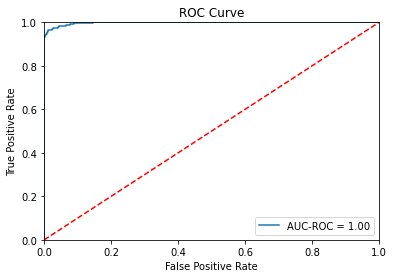

In [49]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_pred_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [50]:
#Save the model
import pickle
filename = 'final-model.csv'

In [51]:
pickle.dump(model_xg_smote,open(filename,'wb'))
load_model = pickle.load(open(filename,'rb'))

In [52]:
model_score_r4 = load_model.score(xr_test2,yr_test2)
model_score_r4

0.9720101781170484